In [8]:
from land_cover import load
from gstools import vario_estimate
from gstools.tools import DEGREE_SCALE, KM_SCALE
from matplotlib import pyplot as plt

In [4]:
gdf = load.loadEfflux()
gdf.head()

,ID,Lat_DD,Lon_DD,AvgOfTempC,AvgOfpH,AvgOfALKum,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,EID,geometry
0,15031700,58.168286,-133.726735,5.00,6.70,119.88,78.780219,0.000000,1234.682567,0.000000,e0,POINT (-133.72673 58.16829)
1,15051000,58.341619,-134.403160,1.50,7.20,319.68,75.041211,20.143512,1025.733067,249.206896,e1,POINT (-134.40316 58.34162)
2,15056120,59.468840,-135.299331,5.50,6.30,319.68,520.969456,0.000000,8315.749472,0.000000,e2,POINT (-135.29933 59.46884)
3,15056310,59.224951,-135.447940,12.25,6.60,849.15,582.689855,205.993601,11276.942548,795.016390,e3,POINT (-135.44794 59.22495)
4,15057860,55.102713,-131.565289,10.50,6.75,309.69,163.063331,44.072168,3025.846654,105.243959,e4,POINT (-131.56529 55.10271)


In [7]:
bin_centers, gammas, counts = vario_estimate(
    (gdf.Lon_DD, gdf.Lat_DD),
    gdf.AvgOfpCO2,
    # bins,
    # sampling_size=1000,
    # sampling_seed=42,
    latlon=True,
    geo_scale=KM_SCALE,
    return_counts=True,
)

Text(0, 0.5, 'Gamma')

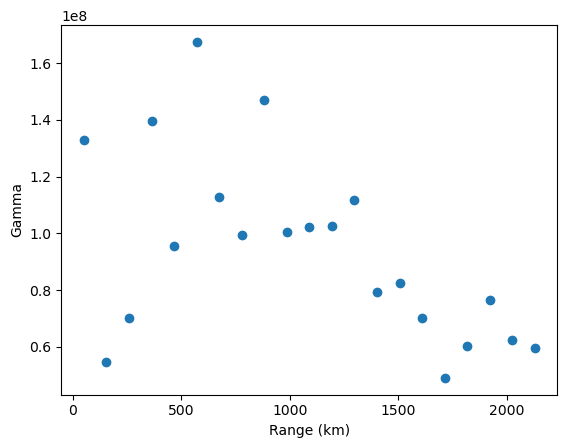

In [9]:
plt.scatter(bin_centers, gammas)
plt.xlabel("Range (km)")
plt.ylabel("Gamma")